## Exploratory Data Analysis

### Imports and constants

In [1]:
import os

os.chdir(os.pardir)
print(os.getcwd())

/Users/humbertoyusta/classes/industrial-ml/brain-tumor-detection


In [60]:
import cv2
import matplotlib.pyplot as plt
import importlib
import preprocessing.data_collector
import preprocessing.data_processor

importlib.reload(preprocessing.data_collector)
importlib.reload(preprocessing.data_processor)

print()

#### Load the dataset, using data collector

In [61]:
collector = preprocessing.data_collector.DataCollector()
images, labels = collector.run()

Dataset URL: https://www.kaggle.com/datasets/volodymyrpivoshenko/brain-mri-scan-images-tumor-detection
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


In [62]:
processor = preprocessing.data_processor.DataProcessor(remove_duplicates=True)
processor.run()

Initial number of images: 480
Number of corrupted images: 0
Number of duplicates removed: 263
Number of images after removing corrupted and duplicated images: 217


(<torch.utils.data.dataloader.DataLoader at 0x17eaa9250>,
 <torch.utils.data.dataloader.DataLoader at 0x17eaa9410>)

In [11]:
def load_image_from_filename(filename: str):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

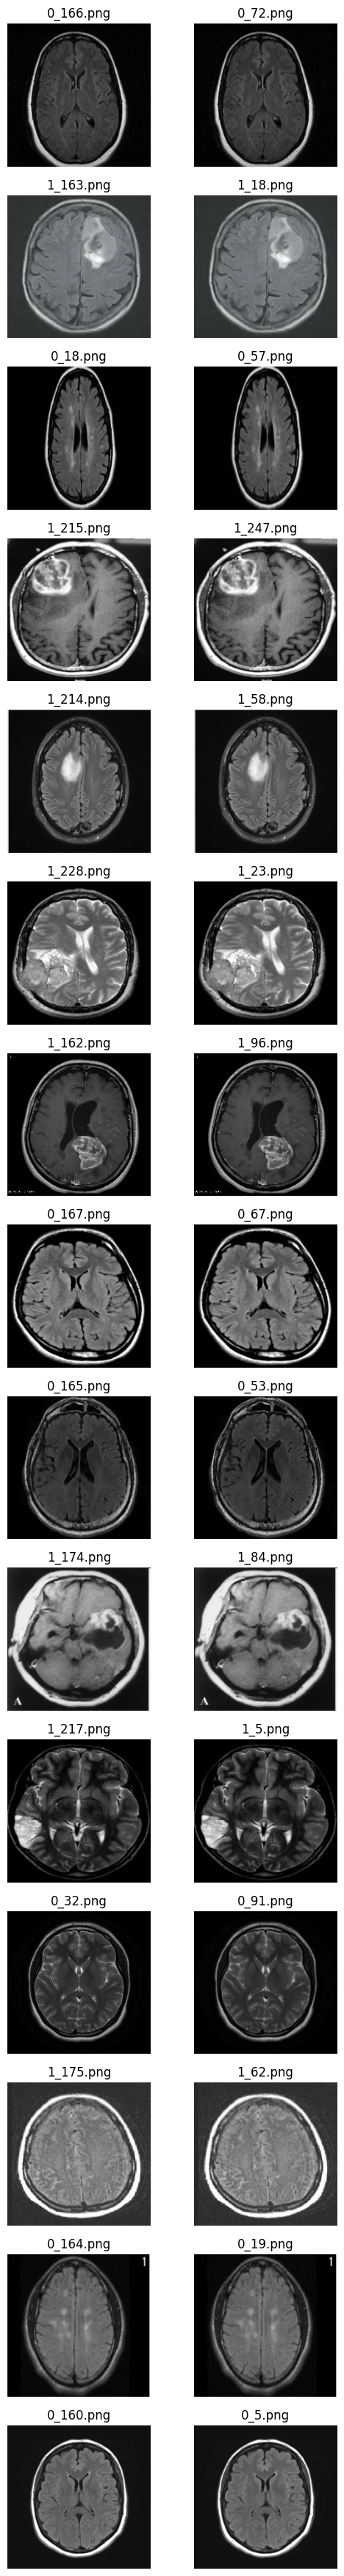

In [12]:
duplicates_pairs_to_show = processor.duplicated_pairs[:30]

fig, axs = plt.subplots(
    nrows=len(duplicates_pairs_to_show) // 2,
    ncols=2,
    figsize=(6, len(duplicates_pairs_to_show) // 2 * 3),
)

for i, pair in enumerate(duplicates_pairs_to_show):
    img1 = load_image_from_filename("data/raw/" + pair[0])
    img2 = load_image_from_filename("data/raw/" + pair[1])

    axs[i // 2, 0].imshow(img1)
    axs[i // 2, 0].axis("off")
    axs[i // 2, 0].set_title(pair[0])

    axs[i // 2, 1].imshow(img2)
    axs[i // 2, 1].axis("off")
    axs[i // 2, 1].set_title(pair[1])

plt.show()

In [14]:
def is_image_corrupted(filepath):
    try:
        img = cv2.imread(filepath)
        if img is None:
            print(f"Corrupted image: {filepath}")
            return True
        return False
    except Exception as e:
        print(f"Corrupted image: {filepath}, Error: {e}")


filepaths = [f"data/raw/{filename}" for filename in os.listdir("data/raw")]

corrupted_images = [filepath for filepath in filepaths if is_image_corrupted(filepath)]

print(f"Found {len(corrupted_images)} corrupted images")

Found 0 corrupted images
